<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/ML_COPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Plot settings

In [134]:
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [135]:
# Importing the datasets
df = pd.read_csv('exp2.csv')

# Display the data

In [136]:
df.iloc[:,:-1].describe()

,height,weight,age,sex,race,smoker,cough,dyspnea,COPD
count,1603.000000,1603.000000,1603.000000,1603.000000,1603.00000,1603.000000,1603.000000,1603.000000,1603.000000
mean,64.548097,193.662913,66.944479,0.524017,0.40549,0.631316,0.581410,0.772302,0.366812
std,4.054318,53.617939,12.033507,0.499579,0.49114,0.482599,0.493482,0.419478,0.482085
min,6.500000,58.750000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,155.000000,61.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,64.250000,188.000000,69.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,67.250000,224.000000,75.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,82.000000,432.000000,95.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [137]:
df.head(10)

,height,weight,age,sex,race,smoker,cough,dyspnea,COPD,fev1-fvc-pre-actual
0,67.25,164.0,75,0,0,1,1,1,1,1
1,67.50,141.0,75,0,0,1,1,1,1,1
2,66.00,140.0,72,0,0,1,1,1,1,1
3,71.50,208.0,69,0,0,1,0,1,1,1
4,59.00,136.5,71,1,0,1,0,1,1,1
5,60.25,174.0,63,1,0,1,0,1,1,1
6,71.50,208.0,70,0,0,1,1,1,1,1
7,62.50,139.5,64,0,0,1,1,1,1,1
8,66.00,170.0,57,0,0,1,0,1,1,1
9,69.50,204.5,71,0,0,1,1,1,0,1


**Data Visulatization**

In [138]:
from matplotlib import pyplot as plt

# fig, (ax1, ax2,ax3) = plt.subplots(1,3)
# fig.suptitle('Data Statistics')
# ax1.plot(OSA, 'o-')
# ax1.set_ylabel('Damped oscillation')
# ax2.plot(x2, y2, '.-')
# ax2.set_xlabel('time (s)')
# ax2.set_ylabel('Undamped')
# plt.show()

# plt.subplot(13)
# # equivalent but more general
# ax1 = plt.subplot(2, 2, 1)
# # add a subplot with no frame
# ax2 = plt.subplot(222, frameon=False)
# # add a polar subplot
# plt.subplot(223, projection='polar')

# snore_freq	snore_vol	choke_freq	apnea_freq	awake_freq	apnea

# fig, axes = plt.subplots(1,7,figsize=(14,5),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='apnea')
# sns.countplot(ax=axes[1],data=df, x='snore_freq')
# sns.countplot(ax=axes[2],data=df, x='snore_vol')
# sns.countplot(ax=axes[3],data=df, x='choke_freq')
# sns.countplot(ax=axes[4],data=df, x='apnea_freq')
# sns.countplot(ax=axes[5],data=df, x='snore_freq')
# sns.countplot(ax=axes[6],data=df, x='awake_freq')
# plt.savefig('Statistics.png')


# Normalizing the data

In [139]:
from sklearn import preprocessing
import numpy as np

# Showing the shape of the data: rows and columns
[n, m] = df.shape
n, m
x_data = df.iloc[:,0:m-1]
y         = df.iloc[:,m-1]

# Normalize data
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x


,height,weight,age,sex,race,smoker,cough,dyspnea,COPD
0,0.804636,0.281983,0.740260,0.0,0.0,1.0,1.0,1.0,1.0
1,0.807947,0.220362,0.740260,0.0,0.0,1.0,1.0,1.0,1.0
2,0.788079,0.217683,0.701299,0.0,0.0,1.0,1.0,1.0,1.0
3,0.860927,0.399866,0.662338,0.0,0.0,1.0,0.0,1.0,1.0
4,0.695364,0.208305,0.688312,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
1598,0.860927,0.485599,0.636364,0.0,0.0,1.0,0.0,1.0,0.0
1599,0.771523,0.340924,0.610390,0.0,1.0,1.0,0.0,1.0,0.0
1600,0.735099,0.263228,0.649351,0.0,1.0,1.0,1.0,1.0,1.0
1601,0.751656,0.389149,0.532468,0.0,1.0,0.0,1.0,0.0,0.0


# Preparing data for machine learning

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

## Correlation between different variables

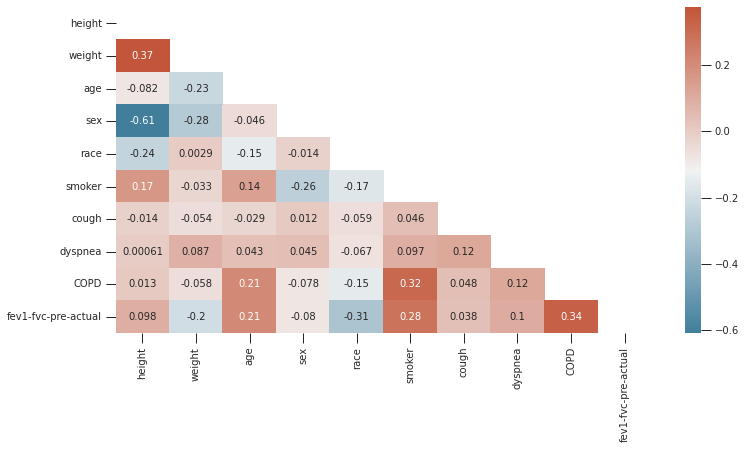

In [154]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 6))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')


## Class distribution in OSA dataset

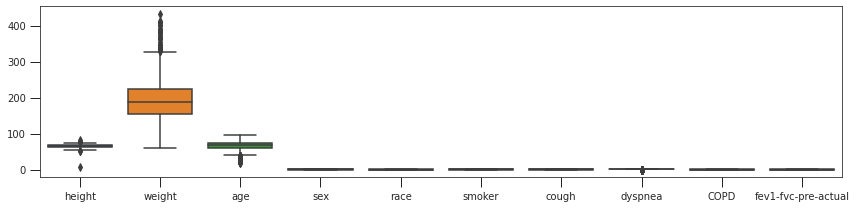

In [155]:
fig, axs = plt.subplots(figsize=(12, 3), tight_layout=True)
sns.boxplot(data=df)
plt.savefig("BoxplotData.png")
plt.show()

In [143]:
# snore_freq	snore_vol	choke_freq	apnea_freq	awake_freq	apnea
# sns.pairplot(df, vars=["choke_freq","apnea_freq","awake_freq","apnea"])
# plt.grid()
# plt.savefig('Correction with Apnea.png')
# plt.show()

In [144]:
def calculate_confusion(name,y_train, y_pred_train, y_test, y_pred_test):
  
  # Making the Confusion Matrix 

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import plot_confusion_matrix

  cm1  = confusion_matrix(y_train, y_pred_train)
  cm2  = confusion_matrix(y_test, y_pred_test)

  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy1  = (cm1[0,0] + cm1[1,1]) / (cm1[0,0] + cm1[0,1] + cm1[1,0] + cm1[1,1])
  precision1 = cm1[1,1] / (cm1[1,1] + cm1[0,1])
  recall1    = cm1[1,1] / (cm1[1,1] + cm1[1,0])

  print('Performance Criteria in Training Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy1)
  print ('precision %.3f' % precision1)
  print('recall %.3f' % recall1)

  ##########################################
  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy2  = (cm2[0,0] + cm2[1,1]) / (cm2[0,0] + cm2[0,1] + cm2[1,0] + cm2[1,1])
  precision2 = cm2[1,1] / (cm2[1,1] + cm2[0,1])
  recall2    = cm2[1,1] / (cm2[1,1] + cm2[1,0])

  print('====================')
  print('Performance Criteria in Testing Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy2)
  print ('precision %.3f' % precision2)
  print('recall %.3f' % recall2)

  cm_train = pd.DataFrame(cm1, range(2), range(2))
  cm_test  = pd.DataFrame(cm2, range(2), range(2))

  f,(ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True)

  g1 = sns.heatmap(cm_train,cbar=False,ax=ax1,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g1.set_title('Training case',fontname= 'serif',fontsize=10, color='k')

  g2 = sns.heatmap(cm_test,cbar=False,ax=ax2,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g2.set_title('Testing case', fontname= 'serif',fontsize=10, color='k')
  
  f.suptitle(' Confusion matrix for '+name, fontsize=11)
  plt.savefig(name + ".png")
  plt.show()

Performance Criteria in Training Case for LR
Accuracy  0.771
precision 0.690
recall 0.540
Performance Criteria in Testing Case for LR
Accuracy  0.776
precision 0.742
recall 0.451


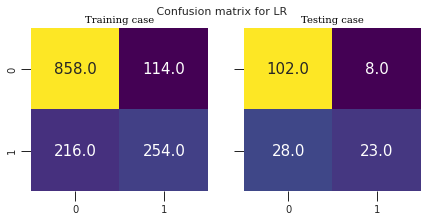

Performance Criteria in Training Case for SVM
Accuracy  0.759
precision 0.706
recall 0.445
Performance Criteria in Testing Case for SVM
Accuracy  0.739
precision 0.667
recall 0.353


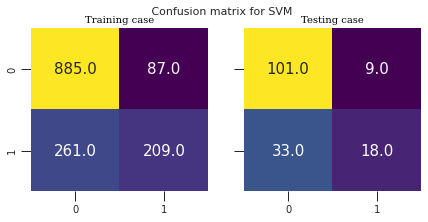

Performance Criteria in Training Case for GBC
Accuracy  0.819
precision 0.774
recall 0.628
Performance Criteria in Testing Case for GBC
Accuracy  0.770
precision 0.694
recall 0.490


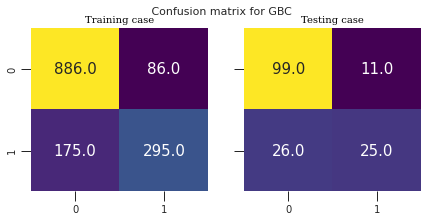

Performance Criteria in Training Case for GNB
Accuracy  0.751
precision 0.606
recall 0.674
Performance Criteria in Testing Case for GNB
Accuracy  0.764
precision 0.633
recall 0.608


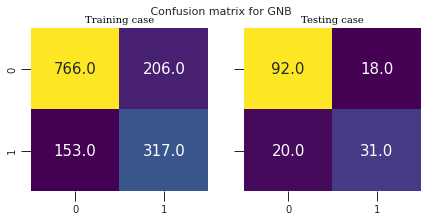

Performance Criteria in Training Case for KNC
Accuracy  0.816
precision 0.747
recall 0.660
Performance Criteria in Testing Case for KNC
Accuracy  0.758
precision 0.636
recall 0.549


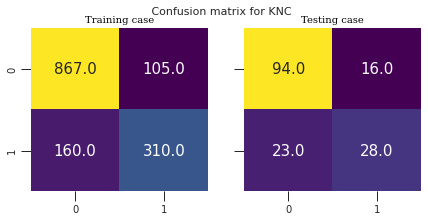

Performance Criteria in Training Case for DT
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for DT
Accuracy  0.677
precision 0.490
recall 0.490


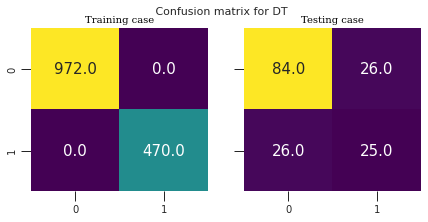

Performance Criteria in Training Case for RFC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for RFC
Accuracy  0.720
precision 0.583
recall 0.412


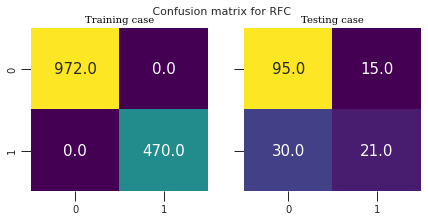

Performance Criteria in Training Case for ANN
Accuracy  0.775
precision 0.685
recall 0.570
Performance Criteria in Testing Case for ANN
Accuracy  0.764
precision 0.697
recall 0.451


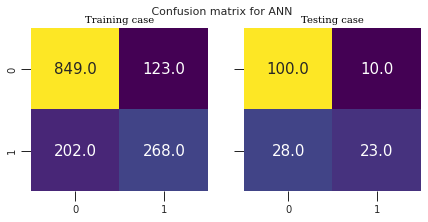

In [156]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)

#SVM ####################################
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_SVC.png')
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GBC.png')
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))

#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GNB.png')
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))

# A random forest classifier:
# A random forest is a meta estimator that fits a number of decision tree 
# classifiers on various sub-samples of the dataset and uses averaging to 
# improve the predictive accuracy and control over-fitting. The sub-sample size 
# is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr5,tpr5,label="KNN, AUC="+str(auc))

# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)
# tree.plot_tree(clf)
# ax1.plot(fpr6,tpr6,label="DT, AUC="+str(auc))

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr7,tpr7,label="RandomForestClassifier, AUC="+str(auc))

#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', hidden_layer_sizes=(15, 1), learning_rate='adaptive',
                    random_state=1, max_iter=5000)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr8,tpr8,label="MLPClassifier, AUC="+str(auc))

In [146]:
# import graphviz
# import pydotplus

# names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']

# fig = plt.figure(figsize=(25,20))
# dot_data = tree.export_graphviz(DT, out_file=None,  feature_names=features,  class_names=names,  filled=True, rounded=True,  special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

# pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
# pydot_graph.set_size('"5,5!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# graph.render(view=True)

In [147]:
# fig = plt.figure(figsize=(25,20))
# _    = tree.plot_tree(DT, 
#                    feature_names=features,  
#                    class_names=names,
#                    filled=True)

In [148]:
# import matplotlib.pyplot as plt

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr1, tpr1, label="LogisticRegression, AUC="+str(auc))
# plt.plot(fpr2, tpr2, label="SVC, AUC="+str(auc))
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [149]:
# import matplotlib.pyplot as plt
# ax = plt.axes()
# fig = plt.figure(figsize=(8,6))
# ax.plot(fpr1,tpr1,label="LogisticRegression, AUC="+str(auc))
# ax.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))
# ax.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))
# ax.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))
# ax.plot(fpr5,tpr5,label="RandomForestClassifier, AUC="+str(auc))
# ax.plot(fpr6,tpr6,label="KNN, AUC="+str(auc))
# # plt.legend()
# plt.savefig('ROC.png')

In [150]:
# fig = plt.figure(figsize=(8,4))
# fig.suptitle('ROC')
# ax = fig.add_subplot(111)
# plt.plot(fpr1,tpr1,label="LogisticRegression, AUC="+str(auc))
# plt.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))
# ax.set_xticklabels(names)
# plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


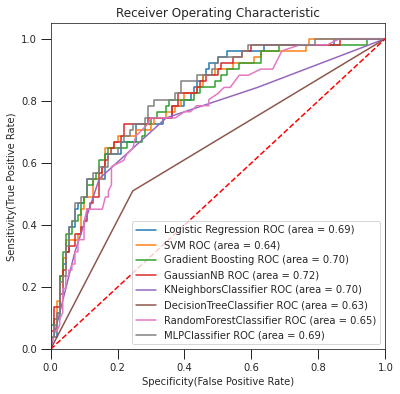

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'SVM',
    'model': SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
},
{
    'label': 'DecisionTreeClassifier',
    'model': tree.DecisionTreeClassifier(),
},
{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'MLPClassifier',
    'model': MLPClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data

# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))

# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display


In [152]:
# from sklearn.metrics import RocCurveDisplay

# fig = plt.figure(figsize=(8,4))
# fig.suptitle('ROC')

# disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, marker="+")
# _ = disp.ax_.set_title("Receiver Operating Characteristic curve")
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate \n(also known as sensitivity or recall)")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend(loc="lower right")

# disp = RocCurveDisplay.from_estimator(svm, x_test, y_test, marker="+")
# _ = disp.ax_.set_title("Receiver Operating Characteristic curve")

# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate\n(also known as sensitivity or recall)")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend(loc="lower right")


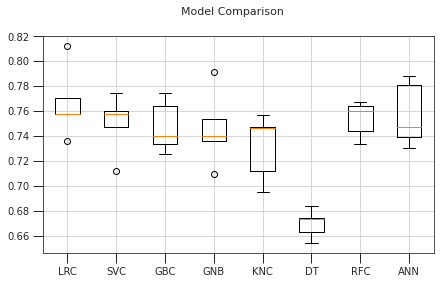

In [159]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(7,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()